In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import random

In [3]:
churn_data = pd.read_csv(r"https://raw.githubusercontent.com/vine0alien/ChurnAnalysis/refs/heads/main/churn_data.csv")

In [4]:
#tratamento breve dos dados em formato de data
churn_data['acquisition_date'] = pd.to_datetime(churn_data['acquisition_date'])
churn_data['last_purchase'] = pd.to_datetime(churn_data['last_purchase'])
churn_data['year'] = churn_data['acquisition_date'].dt.year

In [5]:
def cohort_analysis(data, year, date_column, customerID):
    data_filtered=data[data[date_column].dt.year == year]
    def getting_months(m):
        return dt.datetime(m.year, m.month, 1)
    data_filtered['invoice_month'] = data_filtered[date_column].apply(getting_months)
    data_filtered['cohort_month'] = data_filtered.groupby(customerID)['invoice_month'].transform('min')

    def get_elements_date(df, column):
        day = df[column].dt.day
        month = df[column].dt.month
        year = df[column].dt.year
        return day, month, year
    invoiceday, invoicemonth, invoiceyear = get_elements_date(data_filtered, date_column)
    cohortday, cohortmonth, cohortyear = get_elements_date(data_filtered, 'cohort_month')

    YearDiferrence = invoiceyear-cohortyear
    MonthDiferrence = invoicemonth-cohortmonth

    data_filtered['cohort_index'] = YearDiferrence*12+MonthDiferrence+1

    cohort_final_date = data_filtered.groupby(['cohort_month', 'cohort_index'])[customerID].apply(pd.Series.nunique).reset_index()

    cohort_pivot = cohort_final_date.pivot(index='cohort_month', columns='cohort_index', values=customerID)
    cohort_pivot.index = cohort_pivot.index.strftime('%B %Y')

    plt.figure(figsize=(16,9))
    sns.heatmap(cohort_pivot, annot=True, cmap='Greens')
    plt.title(f'Cohort Analysis for {year}')
    plt.ylabel('')
    plt.xlabel('')

    new_cohort_analysis = cohort_pivot.divide(cohort_pivot.iloc[:,0], axis=0)
    plt.figure(figsize=(16,9))
    colormap = sns.color_palette("mako", as_cmap=True)
    sns.heatmap(new_cohort_analysis, annot=True, fmt='.0%', cmap=colormap)
    plt.title(f'Cohort Analysis for {year}')
    plt.ylabel('')
    plt.xlabel('')

    plt.show()


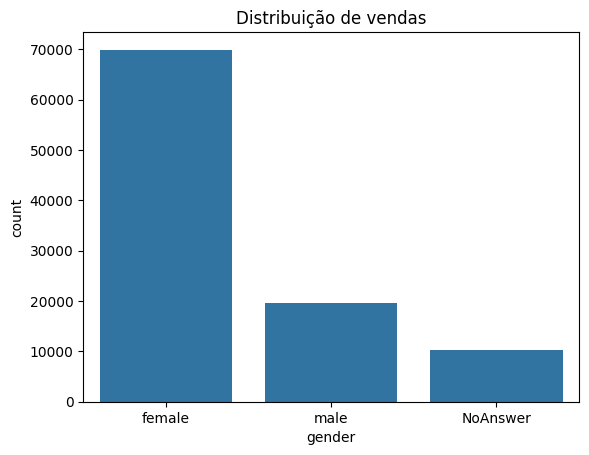

In [6]:
sns.countplot(data=churn_data, x='gender')
plt.title('Distribuição de vendas')
plt.show()

In [7]:
#somando a venda por ano

anual_sales = churn_data.groupby('year')['Price'].sum().reset_index()
anual_sales = pd.DataFrame(anual_sales)

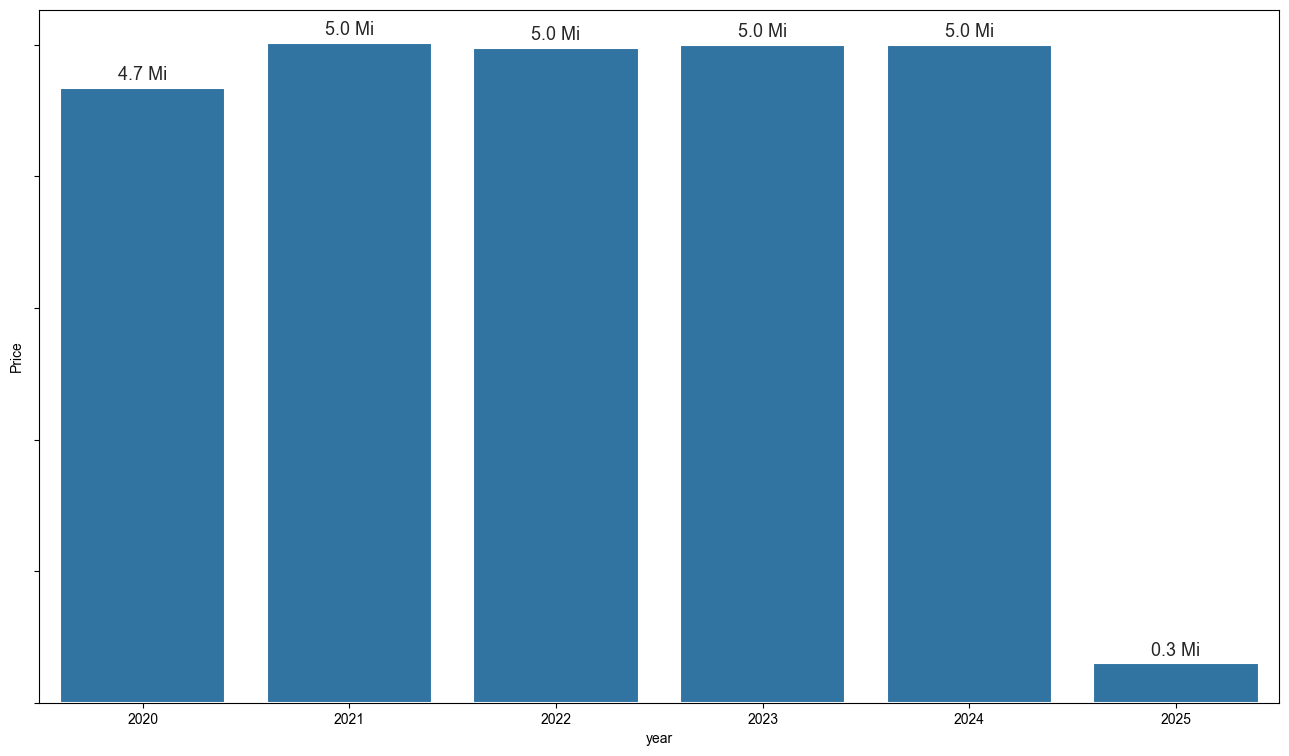

In [8]:
fig, ax = plt.subplots(figsize=(16,9))
sns.set_theme(style='white', context="talk")
sns.barplot(data=anual_sales, x='year', y='Price')

ax.set_yticklabels([])
for i, valor in enumerate(anual_sales['Price']):
    millions_value = valor/1000000
    texto = f'{millions_value:.1f} Mi'
    offset = valor + + 1e5
    ax.text(i, offset, texto, fontsize=13, ha='center', va='center')


C:\Users\vinic\AppData\Local\Temp\ipykernel_24392\3398213229.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=anual_sales, x='year', y='Price', palette=colours)


Text(4.5, 4013438.0, 'Em $\\bf2024$, as vendas\nforam 0.01% maior que no \nano anterior.')

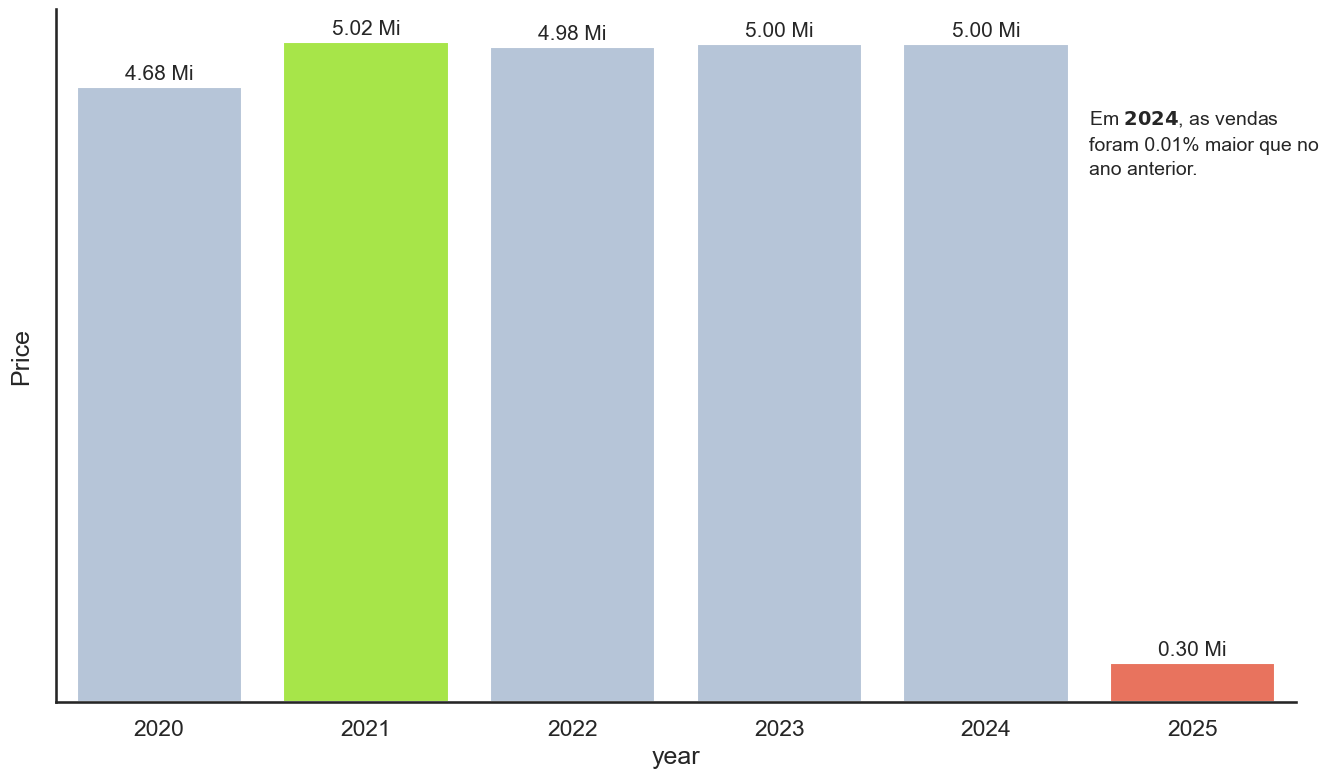

In [9]:
colours = []
for year in anual_sales.index:
    if anual_sales.loc[year, 'Price'] == anual_sales['Price'].max():
        colours.append('#ADFF2F')
    elif anual_sales.loc[year, 'Price'] == anual_sales['Price'].min():
        colours.append('#FF6347')
    else:
        colours.append('#B0C4DE')

fig, ax = plt.subplots(figsize=(16,9))
sns.set_theme(style='white', context="talk")
sns.barplot(data=anual_sales, x='year', y='Price', palette=colours)
sns.despine(right=True)

ax.set_yticklabels([])
for i, value in enumerate(anual_sales['Price']):
    millions_value = value/1000000
    texto = f'{millions_value:.2f} Mi'
    offset = value + 1e5
    ax.text(i, offset, texto, fontsize=15, ha='center', va='center')

sales_2022 = anual_sales[anual_sales['year'] ==2022]['Price'].values[0]
sales_2023 = anual_sales[anual_sales['year'] ==2023]['Price'].values[0]
sales_2024 = anual_sales[anual_sales['year'] ==2024]['Price'].values[0]

growth_2023_2024 = ((sales_2024-sales_2023)/sales_2023)*100

ax.text(4.5, anual_sales['Price'].max()/1.25,
    f'Em $\\bf{2024}$, as vendas\n'
    f'foram {growth_2023_2024:.2f}% maior que no \nano anterior.',
        fontsize=14, linespacing=1.45)

C:\Users\vinic\AppData\Local\Temp\ipykernel_24392\4284222969.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['invoice_month'] = data_filtered[date_column].apply(getting_months)
C:\Users\vinic\AppData\Local\Temp\ipykernel_24392\4284222969.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['cohort_month'] = data_filtered.groupby(customerID)['invoice_month'].transform('min')
C:\Users\vinic\AppData\Local\Temp\ipykernel_24392\4284222969.py:19: SettingWithCopyWarning: 
A value is 

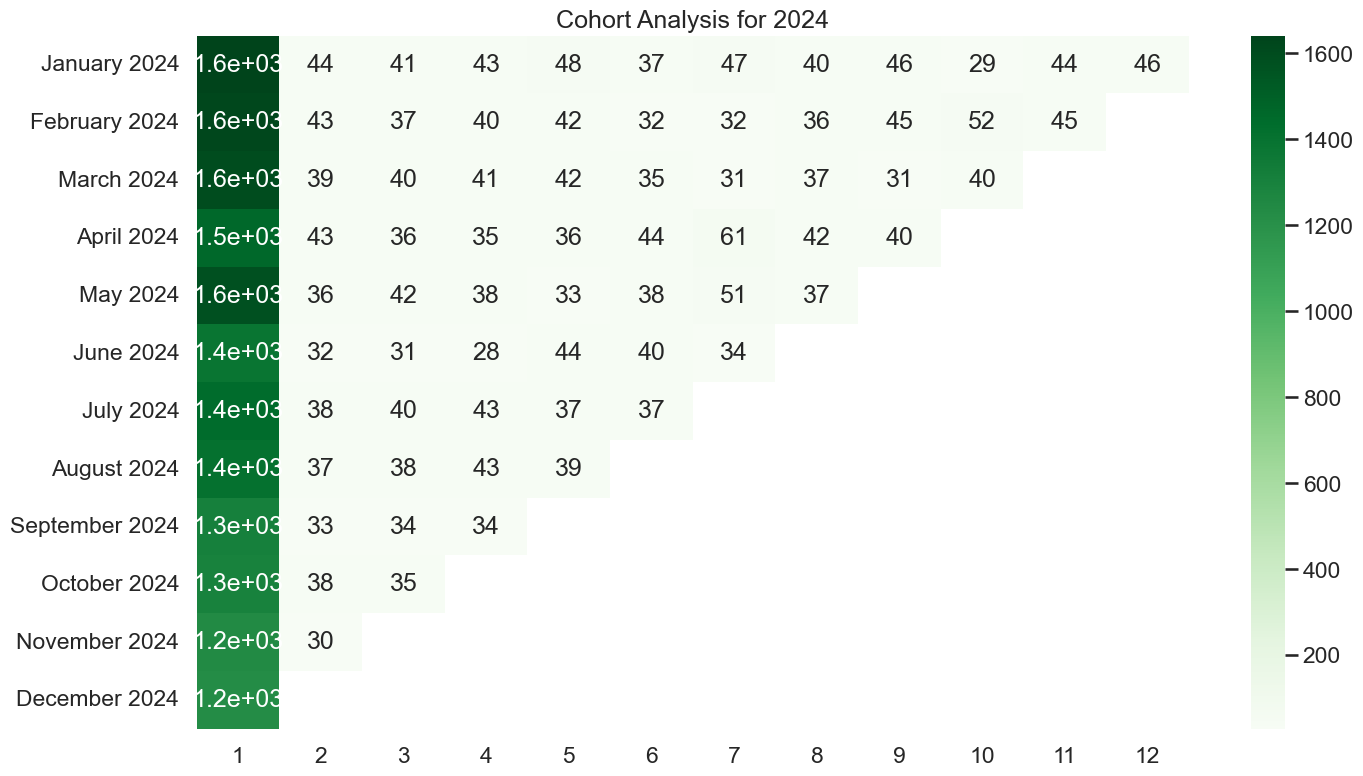

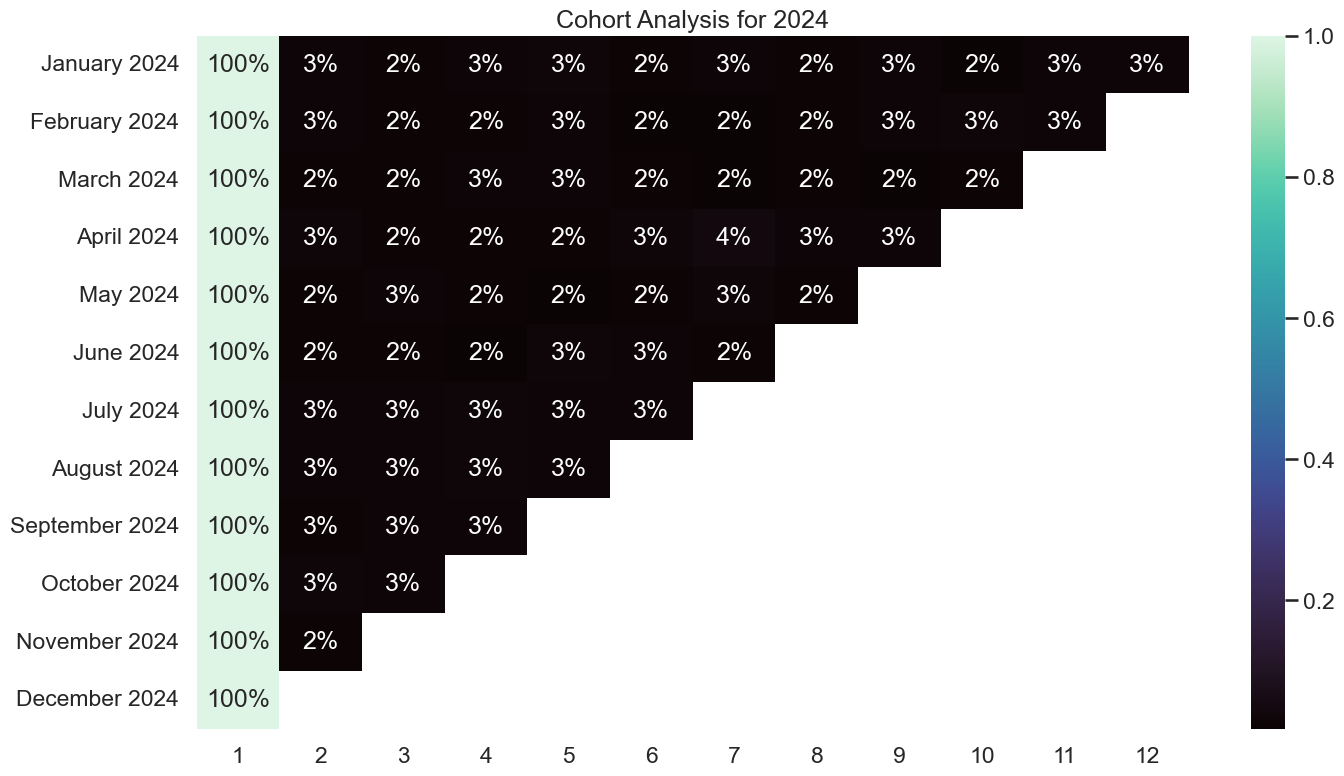

In [10]:
cohort_analysis(churn_data, 2024, 'acquisition_date', 'customer_id')


In [11]:
client_base = churn_data[['customer_id', 'gender', 'e-mail', 'city', 'country', 'age', 'last_purchase']]
client_base = client_base.drop_duplicates('customer_id')

In [12]:
def churn_rate(df, period, last_purchase_date):
    df['days_since_purchase'] = pd.to_datetime('today') - df[last_purchase_date]
    df['days_since_purchase'] = df['days_since_purchase'].dt.days

    df['churn'] = np.where(df['days_since_purchase'] > period, 1, 0)

    churn_mean = df['churn'].mean()

    return churn_mean


In [13]:
periods = range(1, 721)
churn_info = []

for period in periods:
    churn = (churn_rate(client_base, period, 'last_purchase'))
    churn_info.append({'period_days': int(period), 'Churn_rate': float(churn)})
    

df_churn = pd.DataFrame(churn_info)

In [14]:
filtered_data = df_churn[df_churn['period_days']%30 ==0]

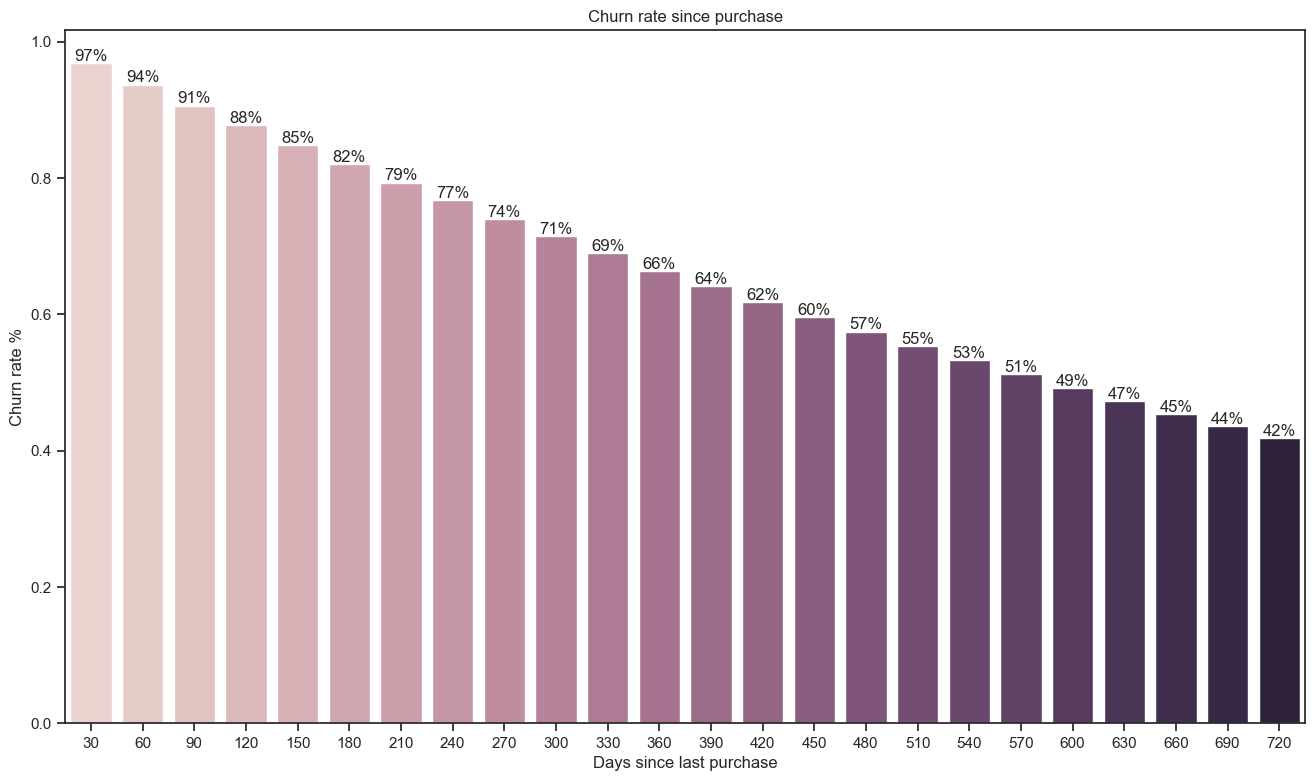

In [15]:
sns.set_theme(style="ticks")
plt.figure(figsize=(16,9))
sns.barplot(data=filtered_data, y='Churn_rate', x='period_days', hue='period_days', legend=False)
plt.title('Churn rate since purchase')
plt.ylabel('Churn rate %')
plt.xlabel('Days since last purchase')


for i, value in enumerate(filtered_data['Churn_rate']):
    percent = value *100
    offset = value +.01
    format_value = f"{percent:.0f}%"
    plt.text(i, offset, format_value, fontsize=12, ha='center', va='center')